# Capstone Project

### Introduction

As one of the world's leading metropolises for art, fashion, food and theater, New York city attracts a large number of tourists and immigrants. It brings in a variety of people from different ethnic backgrounds. As the hub of interactions between multiple cultures, New York city has many opportunities for entrepreneurs to start or grow their business. New York city is also well-known as a 'food paradise', there are many restaurants in New York City, each belonging to different categories like Chinese, Japanese, Thailand, etc. so opening a restaurant seems to have a promising future. 

In this project, I am going to look for an optimal location to open a japanese restaruant for a succuessful business.
There are two aspects that I would mainly consider. The first factor is the extent of competition among janpanese restarnts in different places. The other concern is the popularity of the location, such as whether the place has high average ratings, which is more likely to appeal to more people visting. the report can provide a reference for following audidence: a) people who desire to open a japanese restaurant in New York city; b) Business man who want to invest in janpanese restaurant in New York city; c) visitors or immigrants who are big fan of japanese cuisine.

### Data

The following data is necessary for this project:
a) New York City data that contains Borough, Neighborhoods along with there latitudes and longitudes
Data Source: https://cocl.us/new_york_dataset

Description: This data set is used to to explore various neighborhoods of new york city.

b) Japanese restaurants in Queens neighborhood of new york city.
Data Source: Foursquare API

Description: Foursquare data is very comprehensive and it powers location data,from which we can get details such as latitudes and longtitudes,etc.

c) New York City data containing neighborhood boundaries
Data source: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

### Methodology

a) Data will be collected from https://cocl.us/new_york_dataset and cleaned and processed into a dataframe.

b) FourSquare be used to locate all venues and then filtered by Italian restaurants. Ratings, tips, and likes by users will be counted and added to the dataframe.

c) Data will be sorted based on rankings

d) Data will be visually assessed using graphing from various Python libraries.

### Problem Statement

a) What is / are the best location(s) for Japanese cuisine in New York City? In what Neighborhood and/or borough should I open an japanese restaurant to have the best chance of being successful?

b) Where would tourists or any japanese food fans go in New York City to have the best japanese food? or say which place is more popular among those japanese food fans?

In [60]:
#import packages 
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import os


In [3]:
#!pip install folium
import folium 


     |████████████████████████████████| 93 kB 3.6 MB/s  eta 0:00:01


In [4]:
#!pip install geopy

In [6]:
from geopy.geocoders import Nominatim 

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

print('Done!')

Done!


In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

print('Done!')

Done!


In [9]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [10]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

get data of new york cities

In [11]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [12]:
ny_data.shape

(306, 4)

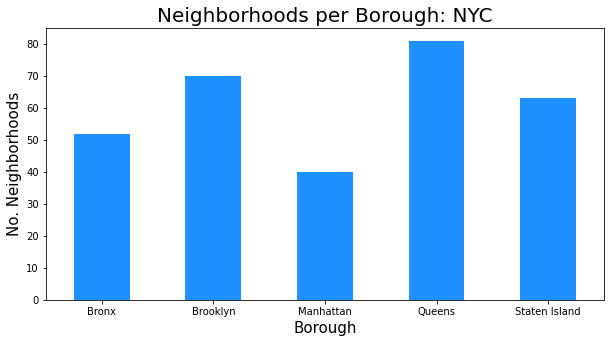

In [13]:
clr = "dodgerblue"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

From the graph, Manhatten seems to have the least number of neighborhoods among above 5 buroughs. The next step is to explore how many janpanese restaurants there are in each neighborhood.

In [20]:
CLIENT_ID = 'JUDC3LAJRA4MIQPIOHVP34UVDYWIDOPUCMYCZVFXQBVD4CUM'
CLIENT_SECRET = 'YTNYB1LNKJ1ZC3FUOREZ3DC2KUHQVT2LEX03FV4UG0SFUH5S' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

then use API to get information about Japanese restarurants in NY city.

In [22]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
japanese_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    japanese_resturants=venues[venues['Category']=='Japanese Restaurant']   
    print('(',count,'/',len(ny_data),')','Japanese Resturants in '+Neighborhood+', '+Borough+':'+str(len(japanese_resturants)))
    print(row)
    for resturant_detail in japanese_resturants.values.tolist():
        id, name , category=resturant_detail
        japanese_rest_ny = japanese_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Japanese Resturants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Japanese Resturants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Japanese Resturants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Japanese Resturants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Japanese Resturants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Japanese Resturants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Japanese Resturants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Japanese Resturants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Japanese Resturants in Norwood, Bronx:0
['

In [23]:
japanese_rest_ny.to_csv('japanese_rest_ny_tocsv1.csv')

In [24]:
japanese_rest_ny = pd.read_csv('japanese_rest_ny_tocsv1.csv')
japanese_rest_ny.tail()

,Unnamed: 0,Borough,Neighborhood,ID,Name
62,62,Manhattan,Flatiron,581a10901df6b32e66ec3a07,Sugarfish
63,63,Manhattan,Flatiron,55805bb5498e8356d675aa22,Yakiniku Futago
64,64,Queens,Sunnyside Gardens,4ba2a9cbf964a520d00d38e3,Oki Japanese Restaurant
65,65,Brooklyn,Fulton Ferry,5cf1562460255e002c5e683c,Bessou
66,66,Brooklyn,Dumbo,5cf1562460255e002c5e683c,Bessou


In [26]:
japanese_rest_ny

,Unnamed: 0,Borough,Neighborhood,ID,Name
0,0,Brooklyn,Kensington,4d5c12a01e43236a87eb1583,Sake Sushi
1,1,Brooklyn,Prospect Heights,5cb5e5f9a35f4600255406c6,Maison Yaki
2,2,Brooklyn,Williamsburg,51f9b7b3498eefe896caeb23,Shalom Japan
3,3,Brooklyn,Bedford Stuyvesant,5b3bcb69bfc6d0002ca9bf17,Warude
4,4,Brooklyn,Brooklyn Heights,479ccb47f964a5206b4d1fe3,Iron Chef House
...,...,...,...,...,...
62,62,Manhattan,Flatiron,581a10901df6b32e66ec3a07,Sugarfish
63,63,Manhattan,Flatiron,55805bb5498e8356d675aa22,Yakiniku Futago
64,64,Queens,Sunnyside Gardens,4ba2a9cbf964a520d00d38e3,Oki Japanese Restaurant
65,65,Brooklyn,Fulton Ferry,5cf1562460255e002c5e683c,Bessou


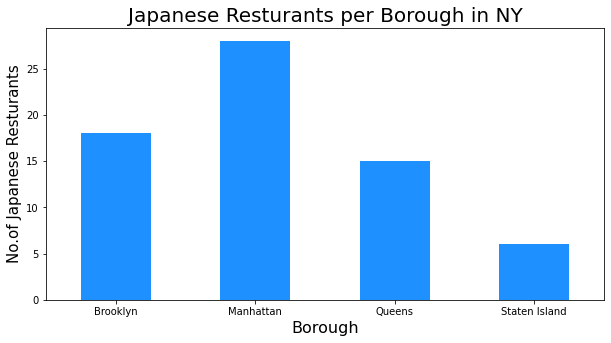

In [30]:
japanese_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Japanese Resturants per Borough in NY', fontsize = 20)
plt.xlabel('Borough', fontsize = 16)
plt.ylabel('No.of Japanese Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

It is interesting to find that Manhatten has the largest number of japanese restaurants, although it has least number of neighborhoods.Then I want to figure out how many restaurants the top 5 neighborhoods have.

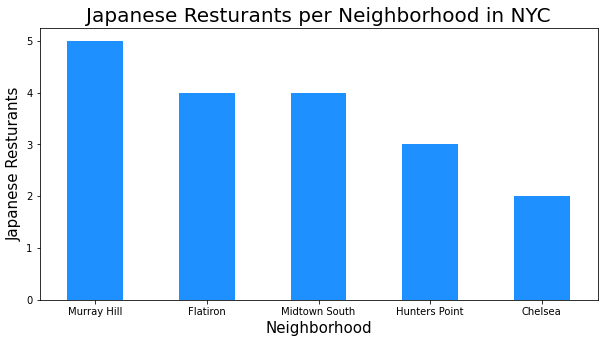

In [32]:
No_of_Neigh = 5 # top number for graphing all the same past 6
japanese_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(No_of_Neigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Japanese Resturants per Neighborhood in NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Japanese Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

we can find that Murray Hill has the greatest number of japanese restaurants, then to list the restaurants in Murray Hill.

In [36]:
japanese_rest_ny[japanese_rest_ny['Neighborhood']=='Murray Hill']

,Unnamed: 0,Borough,Neighborhood,ID,Name
20,20,Manhattan,Murray Hill,4a99b4f4f964a520f62f20e3,Kajitsu
21,21,Manhattan,Murray Hill,559cbaa6498eaa4e8d884811,Tempura Matsui
22,22,Manhattan,Murray Hill,591caee89deb7d0f69be77a2,Omusubi Gonbei
23,23,Manhattan,Murray Hill,540dc46d498e86f0e5059dd2,Zuma New York
38,38,Queens,Murray Hill,4bc8eee83740b713fcbe5d65,Northern Sushi


In [38]:
del japanese_rest_ny['Unnamed: 0']

In [39]:
japanese_rest_ny[japanese_rest_ny['Neighborhood']=='Murray Hill']

,Borough,Neighborhood,ID,Name
20,Manhattan,Murray Hill,4a99b4f4f964a520f62f20e3,Kajitsu
21,Manhattan,Murray Hill,559cbaa6498eaa4e8d884811,Tempura Matsui
22,Manhattan,Murray Hill,591caee89deb7d0f69be77a2,Omusubi Gonbei
23,Manhattan,Murray Hill,540dc46d498e86f0e5059dd2,Zuma New York
38,Queens,Murray Hill,4bc8eee83740b713fcbe5d65,Northern Sushi


In [41]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
japanese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in japanese_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(japanese_rest_ny),')','processed')
    japanese_rest_stats_ny = japanese_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
japanese_rest_stats_ny.tail()

{'meta': {'code': 200, 'requestId': '5fc74f64de8ff27daf636d18'}, 'response': {'venue': {'id': '4d5c12a01e43236a87eb1583', 'name': 'Sake Sushi', 'contact': {'phone': '7188515299', 'formattedPhone': '(718) 851-5299'}, 'location': {'address': '328 Church Ave', 'crossStreet': 'East 4th Street', 'lat': 40.644138, 'lng': -73.976439, 'labeledLatLngs': [{'label': 'display', 'lat': 40.644138, 'lng': -73.976439}], 'postalCode': '11218', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['328 Church Ave (East 4th Street)', 'Brooklyn, NY 11218', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sake-sushi/4d5c12a01e43236a87eb1583', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 49}, 'url': 'http

KeyError: 'venue'

In [42]:
japanese_rest_stats_ny.to_csv('japanese_rest_stats_ny_csv.csv')

In [43]:
japanese_rest_stats_ny.shape

(49, 7)

the following steps are for analysis: to find out the neighbor and borough which have great japanese restaurant by the measure of 'likes' and 'ratings'.

In [44]:
japanese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       49 non-null     object 
 1   Neighborhood  49 non-null     object 
 2   ID            49 non-null     object 
 3   Name          49 non-null     object 
 4   Likes         49 non-null     object 
 5   Rating        49 non-null     float64
 6   Tips          49 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.8+ KB


In [45]:
japanese_rest_stats_ny.describe()

,Rating
count,49.000000
mean,7.548980
std,2.075364
min,0.000000
25%,7.500000
50%,8.200000
75%,8.600000
max,9.300000


In [46]:
japanese_rest_stats_ny['Likes']=japanese_rest_stats_ny['Likes'].astype('float64')
japanese_rest_stats_ny['Tips']=japanese_rest_stats_ny['Tips'].astype('float64')


In [47]:
japanese_rest_stats_ny.describe()

,Likes,Rating,Tips
count,49.000000,49.000000,49.000000
mean,121.816327,7.548980,39.571429
std,200.100774,2.075364,65.981058
min,0.000000,0.000000,0.000000
25%,14.000000,7.500000,6.000000
50%,40.000000,8.200000,13.000000
75%,96.000000,8.600000,46.000000
max,899.000000,9.300000,353.000000


To find the restaurant with the highest ratings

In [48]:
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                East Village
ID              510c85e7e4b0056826b88297
Name                                Kura
Likes                                214
Rating                               9.3
Tips                                  63
Name: 26, dtype: object

In [49]:
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Likes'].idxmax()]

Borough                         Brooklyn
Neighborhood                  North Side
ID              4c7f0887fb74236a7727f9b9
Name                        Samurai Mama
Likes                                899
Rating                                 9
Tips                                 247
Name: 11, dtype: object

In [50]:
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Chelsea
ID              454f7cc4f964a520dc3c1fe3
Name                            Morimoto
Likes                                791
Rating                               8.9
Tips                                 353
Name: 25, dtype: object

In [51]:
ny_neighborhood_stats=japanese_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
9,East Village,9.3
7,Cobble Hill,9.1
28,North Side,9.0
1,Boerum Hill,8.8
33,Soho,8.8
5,Chelsea,8.8
29,Park Slope,8.8
8,Downtown,8.8
11,Fort Greene,8.7
21,Lindenwood,8.7


In [53]:
ny_borough_stats=japanese_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
0,Brooklyn,8.321429
1,Manhattan,8.284211
2,Queens,6.010000
3,Staten Island,5.983333


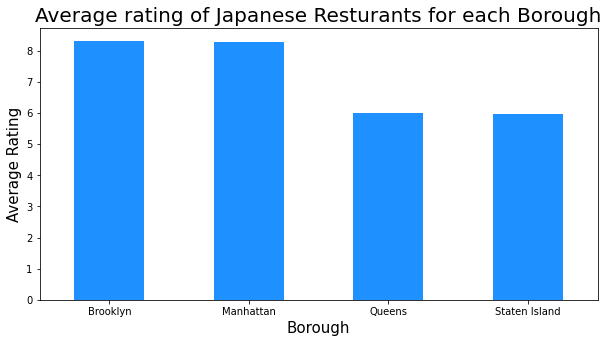

In [59]:
japanese_rest_stats_ny.groupby('Borough').mean()['Rating'].plot.bar(figsize=(10,5), color=clr)
plt.title('Average rating of Japanese Resturants for each Borough', fontsize=20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [54]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Bedford Stuyvesant,8.30
1,Boerum Hill,8.80
2,Brooklyn Heights,8.10
5,Chelsea,8.80
7,Cobble Hill,9.10
8,Downtown,8.80
9,East Village,9.30
11,Fort Greene,8.70
20,Lenox Hill,8.50
21,Lindenwood,8.70


In [55]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Bedford Stuyvesant,40.687232,-73.941785,8.30
1,Brooklyn,Boerum Hill,40.685683,-73.983748,8.80
2,Brooklyn,Brooklyn Heights,40.695864,-73.993782,8.10
3,Manhattan,Chelsea,40.744035,-74.003116,8.80
4,Staten Island,Chelsea,40.594726,-74.189560,8.80
5,Brooklyn,Cobble Hill,40.687920,-73.998561,9.10
6,Brooklyn,Downtown,40.690844,-73.983463,8.80
7,Manhattan,East Village,40.727847,-73.982226,9.30
8,Brooklyn,Fort Greene,40.688527,-73.972906,8.70
9,Manhattan,Lenox Hill,40.768113,-73.958860,8.50


then to visualize data.

In [56]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [57]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

### Discussion

Despite Manhattan having the least number of neighborhoods in all five boroughs, it has the most Japanese restaurants. It has the least number of competitors. Brooklyn and Manhattan have the highest average ratings, so it is highly likely visitors have desire to go to these two boroughs for Japanese food. Additionally, the results show that Brooklyn has the greatest number of ‘likes’, which means that people will be more likely to visit Brooklyn in search for great Japanese food. In other words, Brooklyn will be an attractive place for Japanese cuisine lovers.

### Conclusion

Brooklyn has multiple neighborhoods with high ratings exceeding 8.0 of a scale of 1.0 to 10.0. This place has the best ratings and greatest number of likes on average, which is more likely to appeal to Japanese food fans. Visitors have higher desires to go to Brooklyn then. What makes Brooklyn a more promising market compared with Manhattan is that it has smaller number of Japanese restaurants per borough, making competition easier. Considered above factors, Brooklyn will be an optimal place to start up and invest in a Japanese restaurant. 